In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:

data = pd.read_csv('1632560262896716.csv')
len(data)

200

In [3]:
scaler = StandardScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [4]:
sse = []
for k in range(1, 11):  # بررسی تعداد خوشه‌ها از 1 تا 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)


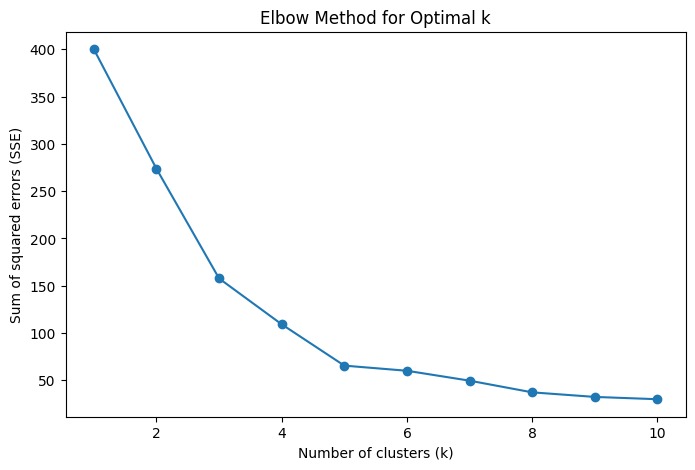

In [5]:
# رسم نمودار برای روش آرنج
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [6]:

k = 5  # مقدار بهینه k را بر اساس نمودار آرنج انتخاب کنید
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [7]:
# بازگرداندن داده‌های نرمال شده به حالت اصلی برای رسم نمودار
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.inverse_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

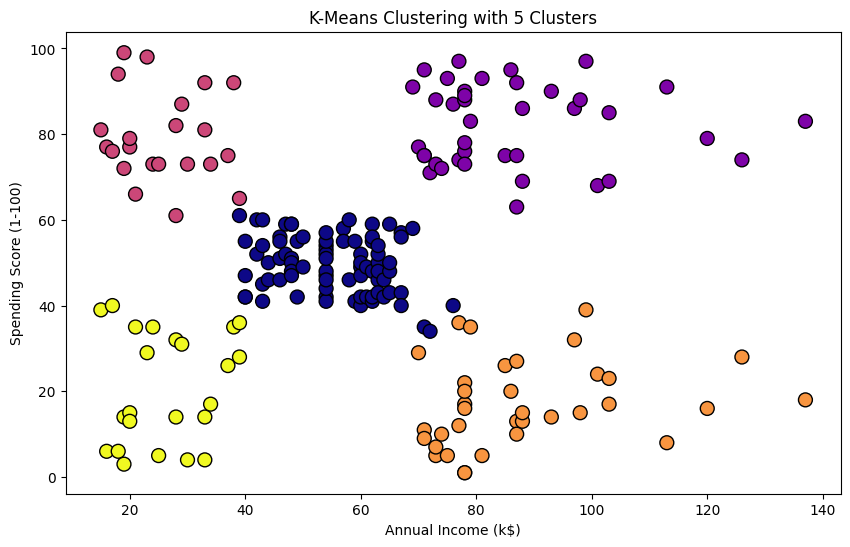

In [8]:

# رسم نمودار خوشه‌بندی
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
            c=data['Cluster'], cmap='plasma', s=100, edgecolor='k')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering with {k} Clusters')
plt.show()
